In [14]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from fim import apriori

In [16]:
df = pd.read_csv("ridotto.csv", skipinitialspace=True, sep=',')
df.head()

,limit,sex,education,status,age,ps-sep,ba-aug,pa-sep,credit_default
0,50000,1,0,2,25.0,2,49985,2130,0
1,200000,1,3,0,54.0,-1,9981,10120,0
2,30000,0,1,0,34.0,2,29280,0,0
3,140000,0,3,2,34.0,0,41717,2000,0
4,60000,0,1,0,36.0,1,48716,1788,1


In [17]:
df.isnull().sum()

limit             0
sex               0
education         0
status            0
age               0
ps-sep            0
ba-aug            0
pa-sep            0
credit_default    0
dtype: int64

Vanno discretizzati gli attributi Limit, age, ba-aug, pa-sep.
Per capire come discretizzarli e come dividere in bin si devono studiare le distribuzioni.
Se le distribuzioni sono uniformi possiamo dividere in un numero X di bin, se invece ci sono dei picchi in alcuni
punti dobbiamo cercare di lasciare i picchi in un unico bin.
Studiamo le distribuzioni di limit, age, ba-aug e pa-sep

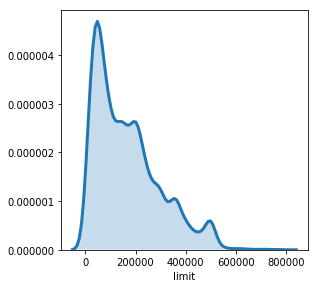

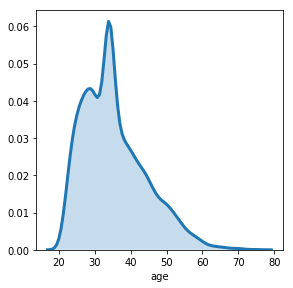

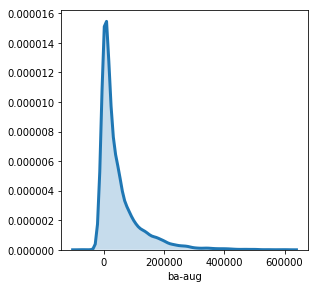

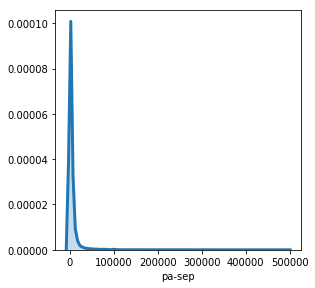

In [18]:
fig = plt.figure(figsize=(15,15))
fig_dims = (3,3)

plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(df['limit'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

fig = plt.figure(figsize=(15,15))
fig_dims = (3,3)
plt.subplot2grid(fig_dims, (0, 1))
sns.distplot(df['age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

fig = plt.figure(figsize=(15,15))
fig_dims = (3,3)
plt.subplot2grid(fig_dims, (1, 0))
sns.distplot(df['ba-aug'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
fig = plt.figure(figsize=(15,15))
fig_dims = (3,3)
plt.subplot2grid(fig_dims, (2, 0))
sns.distplot(df['pa-sep'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

In [19]:
print "limit"
print max(df["limit"])
print min(df["limit"])
print ""
print "age"
print max(df["age"])
print min(df["age"])
print ""
print "ba-aug"
print max(df["ba-aug"])
print min(df["ba-aug"])
print ""
print "pa-sep"
print max(df["pa-sep"])
print min(df["pa-sep"])

limit
780000
10000

age
75.0
21.0

ba-aug
605943
-69777

pa-sep
493358
0


Per age si divide in bin di dimensione uguale fissata a 10, quindi da 20 a 30, da 30 a 40 ecc...
Per limit si divide in bin di dimensione 100.000
Per pa-sep si divide in bin di dimensione 50.000
Per ba-aug dobbiamo dividere in modo che quelli con il valore minore di 0 finiscano in un bin da soli e poi il resto viene diviso in bin di dimensione uguale stando attenti che la parte che forma il picco finisca tutta in un unico bin

In [20]:
df.head()

,limit,sex,education,status,age,ps-sep,ba-aug,pa-sep,credit_default
0,50000,1,0,2,25.0,2,49985,2130,0
1,200000,1,3,0,54.0,-1,9981,10120,0
2,30000,0,1,0,34.0,2,29280,0,0
3,140000,0,3,2,34.0,0,41717,2000,0
4,60000,0,1,0,36.0,1,48716,1788,1


In [21]:
df['limitBin'] = pd.cut(df['limit'].astype(int), 8, right=False)

df['ageBin'] = pd.cut(df['age'].astype(int), 5, right=False)

df['pa-sepBin'] = pd.cut(df['pa-sep'].astype(int), 10, right=False)

df['ba-augBin'] = pd.cut(df['ba-aug'].astype(int), 10, right=False)

In [22]:
print df['limitBin'].value_counts()

print df['ageBin'].value_counts()

print df['pa-sepBin'].value_counts()

print df['ba-augBin'].value_counts()



[10000.0, 106250.0)     4167
[106250.0, 202500.0)    2627
[202500.0, 298750.0)    1521
[298750.0, 395000.0)     991
[395000.0, 491250.0)     401
[491250.0, 587500.0)     268
[587500.0, 683750.0)      17
[683750.0, 780770.0)       8
Name: limitBin, dtype: int64
[31.8, 42.6)      4296
[21.0, 31.8)      3690
[42.6, 53.4)      1628
[53.4, 64.2)       349
[64.2, 75.054)      37
Name: ageBin, dtype: int64
[0.0, 49335.8)            9839
[49335.8, 98671.6)         106
[98671.6, 148007.4)         30
[148007.4, 197343.2)         9
[197343.2, 246679.0)         7
[246679.0, 296014.8)         6
[296014.8, 345350.6)         2
[444022.2, 493851.358)       1
[394686.4, 444022.2)         0
[345350.6, 394686.4)         0
Name: pa-sepBin, dtype: int64
[-2205.0, 65367.0)       7510
[65367.0, 132939.0)      1397
[132939.0, 200511.0)      617
[200511.0, 268083.0)      245
[268083.0, 335655.0)       99
[335655.0, 403227.0)       62
[403227.0, 470799.0)       30
[-69777.0, -2205.0)        22
[470799.0, 538371

In [23]:
dfC = pd.read_csv("credit_default_train.csv", skipinitialspace=True, sep=',')

print dfC['status'].value_counts()



single     4346
married    3757
others       75
Name: status, dtype: int64


In [24]:
df.drop(['ba-aug', 'pa-sep', 'age', 'limit'], axis=1, inplace=True)


df.head()

,sex,education,status,ps-sep,credit_default,limitBin,ageBin,pa-sepBin,ba-augBin
0,1,0,2,2,0,"[10000.0, 106250.0)","[21.0, 31.8)","[0.0, 49335.8)","[-2205.0, 65367.0)"
1,1,3,0,-1,0,"[106250.0, 202500.0)","[53.4, 64.2)","[0.0, 49335.8)","[-2205.0, 65367.0)"
2,0,1,0,2,0,"[10000.0, 106250.0)","[31.8, 42.6)","[0.0, 49335.8)","[-2205.0, 65367.0)"
3,0,3,2,0,0,"[106250.0, 202500.0)","[31.8, 42.6)","[0.0, 49335.8)","[-2205.0, 65367.0)"
4,0,1,0,1,1,"[10000.0, 106250.0)","[31.8, 42.6)","[0.0, 49335.8)","[-2205.0, 65367.0)"


In [25]:
df['sex'] = df['sex'].map(
    {0: 'Female', 1: 'Male'}).astype(str)

df['education'] = df['education'].map(
    {0: 'graduateSchool', 1: 'high school', 2: 'others', 3: 'university'}).astype(str)


df['status'] = df['status'].map({0: 'married', 1: 'other', 2: 'married'}).astype(str)



df['ps-sep'] = df['ps-sep'].map({-2: 'NoConsumption', -1: 'Paid', 0: 'RevolvingCredit', 1: '1Month', 
                                 2: '2Month', 3: '3Month',4: '4Month',5: '5Month',
                                 6: '6Month',7: '7Month',8: '8Month',9: '9Month'}).astype(str)

df['credit_default'] = df['credit_default'].map(
    {0: 'No', 1: 'Yes'}).astype(str)

df['limitBin'] = df['limitBin'].astype(str) + '_Limit'
df['ageBin'] = df['ageBin'].astype(str) + '_Age'
df['pa-sepBin'] = df['pa-sepBin'].astype(str) + '_Pa-Sep'
df['ba-augBin'] = df['ba-augBin'].astype(str) + '_Ba-Aug'

df.head()

,sex,education,status,ps-sep,credit_default,limitBin,ageBin,pa-sepBin,ba-augBin
0,Male,graduateSchool,married,2Month,No,"[10000.0, 106250.0)_Limit","[21.0, 31.8)_Age","[0.0, 49335.8)_Pa-Sep","[-2205.0, 65367.0)_Ba-Aug"
1,Male,university,married,Paid,No,"[106250.0, 202500.0)_Limit","[53.4, 64.2)_Age","[0.0, 49335.8)_Pa-Sep","[-2205.0, 65367.0)_Ba-Aug"
2,Female,high school,married,2Month,No,"[10000.0, 106250.0)_Limit","[31.8, 42.6)_Age","[0.0, 49335.8)_Pa-Sep","[-2205.0, 65367.0)_Ba-Aug"
3,Female,university,married,RevolvingCredit,No,"[106250.0, 202500.0)_Limit","[31.8, 42.6)_Age","[0.0, 49335.8)_Pa-Sep","[-2205.0, 65367.0)_Ba-Aug"
4,Female,high school,married,1Month,Yes,"[10000.0, 106250.0)_Limit","[31.8, 42.6)_Age","[0.0, 49335.8)_Pa-Sep","[-2205.0, 65367.0)_Ba-Aug"


In [26]:
df = df[['credit_default', 'sex', 'education', 'status', 'ps-sep', 'limitBin', 'ageBin', 'pa-sepBin', 'ba-augBin']]

In [27]:
df.head()

,credit_default,sex,education,status,ps-sep,limitBin,ageBin,pa-sepBin,ba-augBin
0,No,Male,graduateSchool,married,2Month,"[10000.0, 106250.0)_Limit","[21.0, 31.8)_Age","[0.0, 49335.8)_Pa-Sep","[-2205.0, 65367.0)_Ba-Aug"
1,No,Male,university,married,Paid,"[106250.0, 202500.0)_Limit","[53.4, 64.2)_Age","[0.0, 49335.8)_Pa-Sep","[-2205.0, 65367.0)_Ba-Aug"
2,No,Female,high school,married,2Month,"[10000.0, 106250.0)_Limit","[31.8, 42.6)_Age","[0.0, 49335.8)_Pa-Sep","[-2205.0, 65367.0)_Ba-Aug"
3,No,Female,university,married,RevolvingCredit,"[106250.0, 202500.0)_Limit","[31.8, 42.6)_Age","[0.0, 49335.8)_Pa-Sep","[-2205.0, 65367.0)_Ba-Aug"
4,Yes,Female,high school,married,1Month,"[10000.0, 106250.0)_Limit","[31.8, 42.6)_Age","[0.0, 49335.8)_Pa-Sep","[-2205.0, 65367.0)_Ba-Aug"


In [28]:
# Creiamo i basket ovvero per ogni riga prendiamo i valori corrispondenti ai vari attributi
baskets = df.values.tolist()

### ItemSet Massimali

In [157]:
# Applichiamo l'algoritmo APriori per estrarre gli itemset che hanno un minSup > 2
itemsets = apriori(baskets, supp=20, zmin=4, target='m') 

In [158]:
print('Number of itemsets:', len(itemsets))

('Number of itemsets:', 20)


In [159]:
itemsets[0]

(('[106250.0, 202500.0)_Limit', 'No', '[0.0, 49335.8)_Pa-Sep', 'married'),
 2073)

In [160]:
itemsets.sort(key=lambda x: x[1],reverse=True)

In [161]:
itemsets[:10]

[(('Female',
   '[-2205.0, 65367.0)_Ba-Aug',
   'No',
   '[0.0, 49335.8)_Pa-Sep',
   'married'),
  3587),
 (('university',
   '[-2205.0, 65367.0)_Ba-Aug',
   'No',
   '[0.0, 49335.8)_Pa-Sep',
   'married'),
  2600),
 (('RevolvingCredit', 'Female', 'No', '[0.0, 49335.8)_Pa-Sep', 'married'),
  2580),
 (('RevolvingCredit',
   '[-2205.0, 65367.0)_Ba-Aug',
   'No',
   '[0.0, 49335.8)_Pa-Sep',
   'married'),
  2548),
 (('[10000.0, 106250.0)_Limit',
   '[-2205.0, 65367.0)_Ba-Aug',
   'No',
   '[0.0, 49335.8)_Pa-Sep',
   'married'),
  2530),
 (('[31.8, 42.6)_Age',
   '[-2205.0, 65367.0)_Ba-Aug',
   'No',
   '[0.0, 49335.8)_Pa-Sep',
   'married'),
  2452),
 (('[21.0, 31.8)_Age', 'Female', '[0.0, 49335.8)_Pa-Sep', 'married'), 2398),
 (('university', 'Female', 'No', '[0.0, 49335.8)_Pa-Sep', 'married'), 2265),
 (('[10000.0, 106250.0)_Limit',
   'RevolvingCredit',
   '[0.0, 49335.8)_Pa-Sep',
   'married'),
  2228),
 (('[21.0, 31.8)_Age',
   '[-2205.0, 65367.0)_Ba-Aug',
   'No',
   '[0.0, 49335.8)_P

### ItemSet Closed

In [164]:
# Applichiamo l'algoritmo APriori per estrarre gli itemset che hanno un minSup > 2
itemsets = apriori(baskets, supp=30, zmin=4, target='c') 

In [165]:
print('Number of itemsets:', len(itemsets))

('Number of itemsets:', 12)


In [166]:
itemsets[0]

(('[10000.0, 106250.0)_Limit',
  '[-2205.0, 65367.0)_Ba-Aug',
  '[0.0, 49335.8)_Pa-Sep',
  'married'),
 3639)

In [167]:
itemsets.sort(key=lambda x: x[1],reverse=True)

In [168]:
itemsets[:10]

[(('[-2205.0, 65367.0)_Ba-Aug', 'No', '[0.0, 49335.8)_Pa-Sep', 'married'),
  5711),
 (('Female', 'No', '[0.0, 49335.8)_Pa-Sep', 'married'), 4762),
 (('Female', '[-2205.0, 65367.0)_Ba-Aug', '[0.0, 49335.8)_Pa-Sep', 'married'),
  4531),
 (('RevolvingCredit', 'No', '[0.0, 49335.8)_Pa-Sep', 'married'), 4177),
 (('[10000.0, 106250.0)_Limit',
   '[-2205.0, 65367.0)_Ba-Aug',
   '[0.0, 49335.8)_Pa-Sep',
   'married'),
  3639),
 (('Female', '[-2205.0, 65367.0)_Ba-Aug', 'No', 'married'), 3613),
 (('Female', '[-2205.0, 65367.0)_Ba-Aug', 'No', '[0.0, 49335.8)_Pa-Sep'),
  3608),
 (('Female',
   '[-2205.0, 65367.0)_Ba-Aug',
   'No',
   '[0.0, 49335.8)_Pa-Sep',
   'married'),
  3587),
 (('university', 'No', '[0.0, 49335.8)_Pa-Sep', 'married'), 3569),
 (('university',
   '[-2205.0, 65367.0)_Ba-Aug',
   '[0.0, 49335.8)_Pa-Sep',
   'married'),
  3475)]

### ItemSet Frequenti

In [169]:
# Applichiamo l'algoritmo APriori per estrarre gli itemset che hanno un minSup > 2
itemsets = apriori(baskets, supp=30, zmin=4, target='a') 

In [170]:
print('Number of itemsets:', len(itemsets))

('Number of itemsets:', 12)


In [171]:
itemsets[0]

(('[10000.0, 106250.0)_Limit',
  '[-2205.0, 65367.0)_Ba-Aug',
  '[0.0, 49335.8)_Pa-Sep',
  'married'),
 3639)

In [172]:
itemsets.sort(key=lambda x: x[1],reverse=True)

In [173]:
itemsets[:10]

[(('[-2205.0, 65367.0)_Ba-Aug', 'No', '[0.0, 49335.8)_Pa-Sep', 'married'),
  5711),
 (('Female', 'No', '[0.0, 49335.8)_Pa-Sep', 'married'), 4762),
 (('Female', '[-2205.0, 65367.0)_Ba-Aug', '[0.0, 49335.8)_Pa-Sep', 'married'),
  4531),
 (('RevolvingCredit', 'No', '[0.0, 49335.8)_Pa-Sep', 'married'), 4177),
 (('[10000.0, 106250.0)_Limit',
   '[-2205.0, 65367.0)_Ba-Aug',
   '[0.0, 49335.8)_Pa-Sep',
   'married'),
  3639),
 (('Female', '[-2205.0, 65367.0)_Ba-Aug', 'No', 'married'), 3613),
 (('Female', '[-2205.0, 65367.0)_Ba-Aug', 'No', '[0.0, 49335.8)_Pa-Sep'),
  3608),
 (('Female',
   '[-2205.0, 65367.0)_Ba-Aug',
   'No',
   '[0.0, 49335.8)_Pa-Sep',
   'married'),
  3587),
 (('university', 'No', '[0.0, 49335.8)_Pa-Sep', 'married'), 3569),
 (('university',
   '[-2205.0, 65367.0)_Ba-Aug',
   '[0.0, 49335.8)_Pa-Sep',
   'married'),
  3475)]

### Association Rules

In [182]:
rules = apriori(baskets, supp=60, zmin=3, target='r', conf=40, 
                report='ascl') 

In [183]:
print('Number of rule:', len(rules))

('Number of rule:', 53)


In [186]:
# (2443, (3086,), 3, 0.013215859030837005, 1.0, 9.869565217391305)

# i primi formano l'association rule, quindi vuol dire che quando compro 2443 spesso compro anche 3086
# poi il terzo è il support dell'item set, il quarto è il support relativo espresso come frazione
# poi il quinto è la confidence della rule, il sesto è il lift value.
rules[0]

('[10000.0, 106250.0)_Limit',
 ('[-2205.0, 65367.0)_Ba-Aug', '[0.0, 49335.8)_Pa-Sep', 'married'),
 3639,
 0.3639,
 0.4915574766986357,
 1.1796435725909185)

In [188]:
rules.sort(key=lambda x: x[4],reverse=True)

In [201]:
count = 1
Cyan = True
for r in rules:
    if(r[4]>0.8 and r[4]):
        if(Cyan):
            Cyan = False
            print " \rowcolor{cyan!20} ",count, " & ",r[1]," & ", r[0], " & ", r[4], " & ", r[5],"\%\\"
        else:
            Cyan = True
            print count, " & ",r[1]," & ", r[0], " & ", r[4], " & ", r[5],"\%\\"
        count += 1
        

                                                                     

owcolor{cyan!20}  1  &  ('No', '[0.0, 49335.8)_Pa-Sep')  &  married  &  0.993587226803  &  1.00109544262 \%\
2  &  ('[-2205.0, 65367.0)_Ba-Aug', 'married')  &  [0.0, 49335.8)_Pa-Sep  &  0.99355791169  &  1.00981594846 \%\
owcolor{cyan!20}  3  &  ('Female', '[0.0, 49335.8)_Pa-Sep')  &  married  &  0.993037135279  &  1.00054119424 \%\
4  &  ('[-2205.0, 65367.0)_Ba-Aug', '[0.0, 49335.8)_Pa-Sep')  &  married  &  0.992226243131  &  0.999724174439 \%\
owcolor{cyan!20}  5  &  ('Female', 'married')  &  [0.0, 49335.8)_Pa-Sep  &  0.983741172606  &  0.999838573642 \%\
6  &  ('No', 'married')  &  [0.0, 49335.8)_Pa-Sep  &  0.981132075472  &  0.997186782673 \%\


In [203]:
count = 1
Cyan = True
for r in rules:
    if(r[4]>=0.6 and r[4]<0.7):
        if(Cyan):
            Cyan = False
            print " \rowcolor{cyan!20} ",count, " & ",r[1]," & ", r[0], " & ", r[4], "\% & ", r[5],"\\"
        else:
            Cyan = True
            print count, " & ",r[1]," & ", r[0], " & ", r[4], "\% & ", r[5],"\\"
        count += 1
        

                                                                     

owcolor{cyan!20}  1  &  ('No', '[0.0, 49335.8)_Pa-Sep', 'married')  &  Female  &  0.627239199157 \% &  1.02289497579 \
2  &  ('No', 'married')  &  Female  &  0.627164642026 \% &  1.02277338882 \
owcolor{cyan!20}  3  &  ('No', '[0.0, 49335.8)_Pa-Sep')  &  Female  &  0.627143044104 \% &  1.02273816716 \
4  &  ('[0.0, 49335.8)_Pa-Sep', 'married')  &  Female  &  0.613415258577 \% &  1.00035104138 \
owcolor{cyan!20}  5  &  ('[-2205.0, 65367.0)_Ba-Aug', 'married')  &  Female  &  0.61253523017 \% &  0.998915900474 \
6  &  ('[-2205.0, 65367.0)_Ba-Aug', '[0.0, 49335.8)_Pa-Sep', 'married')  &  Female  &  0.612049169256 \% &  0.998123237534 \
owcolor{cyan!20}  7  &  ('[-2205.0, 65367.0)_Ba-Aug', '[0.0, 49335.8)_Pa-Sep')  &  Female  &  0.611446186838 \% &  0.997139900258 \
